In [33]:
import pandas as pd

raw_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data = raw_data.copy()
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [34]:
#Get data information
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [35]:
#Check for Missing Values
missing_val = data.isnull().sum()
missing_val

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [41]:
# Convert binary columns to numerical values
binary_columns = ['gender', 'PaperlessBilling', 'Churn', 'PhoneService']
data[binary_columns] = data[binary_columns].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

# Map 'No phone service' in 'MultipleLines' to 0, and 'No' to 0, 'Yes' to 1
data['MultipleLines'] = data['MultipleLines'].replace({'No phone service': 0, 'No': 0, 'Yes': 1})

# Convert remaining 'yes'/'no' columns to binary
remaining_columns = ['Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
data[remaining_columns] = data[remaining_columns].replace({'Yes': 1, 'No': 0, 'No internet service': 0})

# Check if categorical_columns exist in the DataFrame before applying one-hot encoding
categorical_columns = ['InternetService', 'Contract', 'PaymentMethod']
existing_columns = list(set(categorical_columns).intersection(set(data.columns)))
data = pd.get_dummies(data, columns=existing_columns, drop_first=True)

print(data)


      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG       0              0        1           0       1   
1     5575-GNVDE       1              0        0           0      34   
2     3668-QPYBK       1              0        0           0       2   
3     7795-CFOCW       1              0        0           0      45   
4     9237-HQITU       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB       1              0        1           1      24   
7039  2234-XADUH       0              0        1           1      72   
7040  4801-JZAZL       0              0        1           1      11   
7041  8361-LTMKD       1              1        1           0       4   
7042  3186-AJIEK       1              0        0           0      66   

      PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  ...  \
0                0              0               0             1

In [42]:
#Taking the churn column count to determine if the data is balanced
count_0 = 0
count_1 = 0

for i in data['Churn']:
    if i == 0:
        count_0 = count_0 + 1
    else:
        count_1 = count_1 + 1
print('Count_1', count_1)
print('Count_0', count_0)

Count_1 1869
Count_0 5174


In [43]:
# Handle missing values and non-numeric entries in TotalCharges
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Standardize numerical columns

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Drop irrelevant columns
data.drop(columns=['customerID'], inplace=True)


In [44]:
#Attaching features and target variables
X = data.drop(columns=['Churn'])
y = data['Churn']

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Applying SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 43)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [45]:
# Scale the data
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [47]:
print("Column names in the dataframe:")
print(data.columns)

Column names in the dataframe:
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


C:\Users\Goodness\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.16476983558608974
Calinski-Harabasz Score: 1576.0358695951106
Davies-Bouldin Score: 1.8971017458728656


C:\Users\Goodness\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


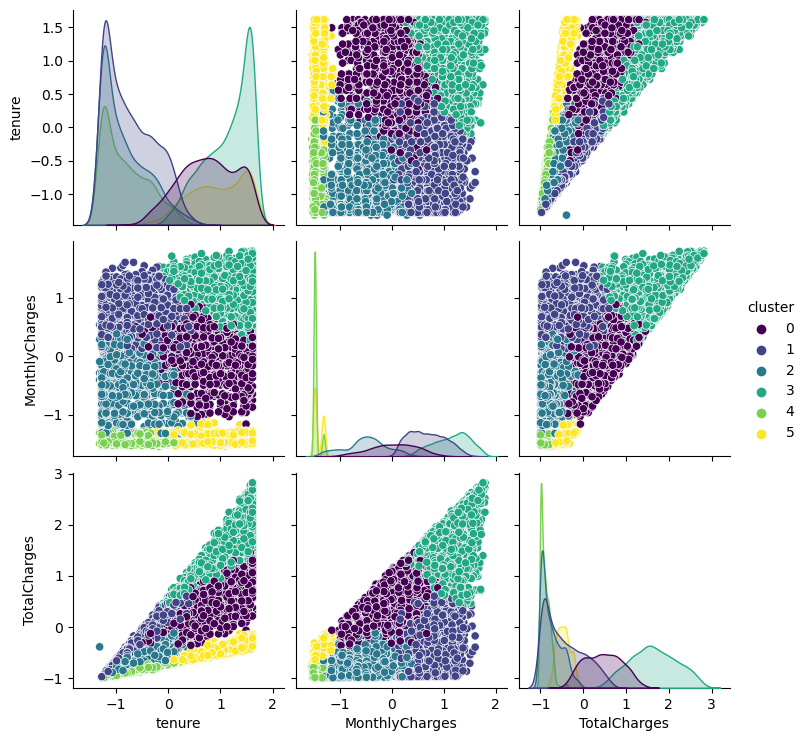

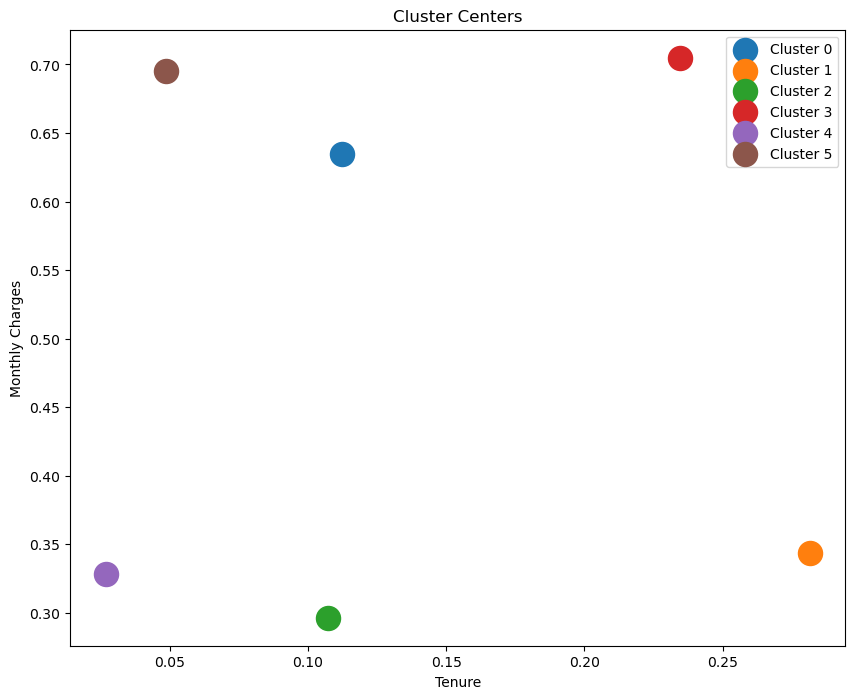

In [50]:

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


# Selected features for clustering
selected_features = selected_features = [
    'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
    'InternetService_Fiber optic', 'InternetService_No',
    'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'
]
X = data[selected_features]

# Choose the number of clusters (replace 'n_clusters' with your desired number)
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Evaluation
# Silhouette score
silhouette_avg = silhouette_score(X, data['cluster'])
print("Silhouette Score:", silhouette_avg)

# Calinski-Harabasz score
calinski_harabasz = calinski_harabasz_score(X, data['cluster'])
print("Calinski-Harabasz Score:", calinski_harabasz)

# Davies-Bouldin score
davies_bouldin = davies_bouldin_score(X, data['cluster'])
print("Davies-Bouldin Score:", davies_bouldin)

# Visualization
# Pairplot of selected features colored by cluster
sns.pairplot(data, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='cluster', palette='viridis')
plt.show()

# Visualize cluster centers
cluster_centers = kmeans.cluster_centers_
plt.figure(figsize=(10, 8))
for i in range(n_clusters):
    plt.scatter(cluster_centers[i, 0], cluster_centers[i, 1], s=300, label=f'Cluster {i}')
plt.legend()
plt.title('Cluster Centers')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()


C:\Users\Goodness\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Goodness\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Goodness\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Goodness\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

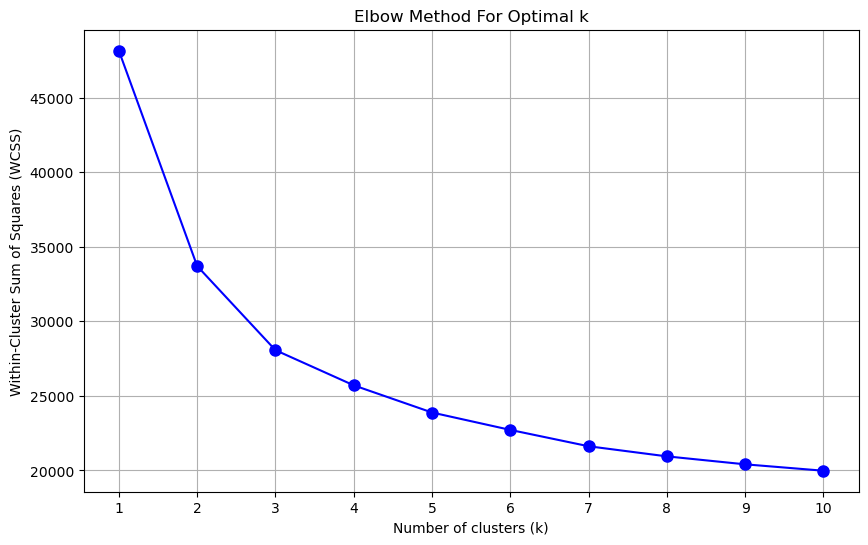

In [49]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Define the range of clusters to test
k_values = range(1, 11)
wcss = []

# Compute WCSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS against k
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

C:\Users\Goodness\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.19676067302965689
Calinski-Harabasz Score: 2048.730719389938
Davies-Bouldin Score: 1.6581465883831827


C:\Users\Goodness\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


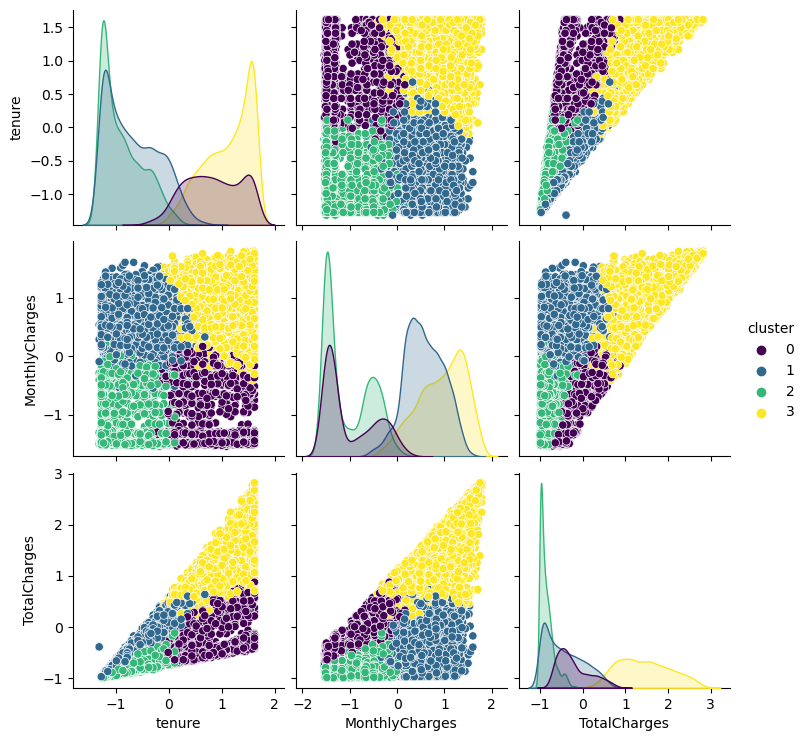

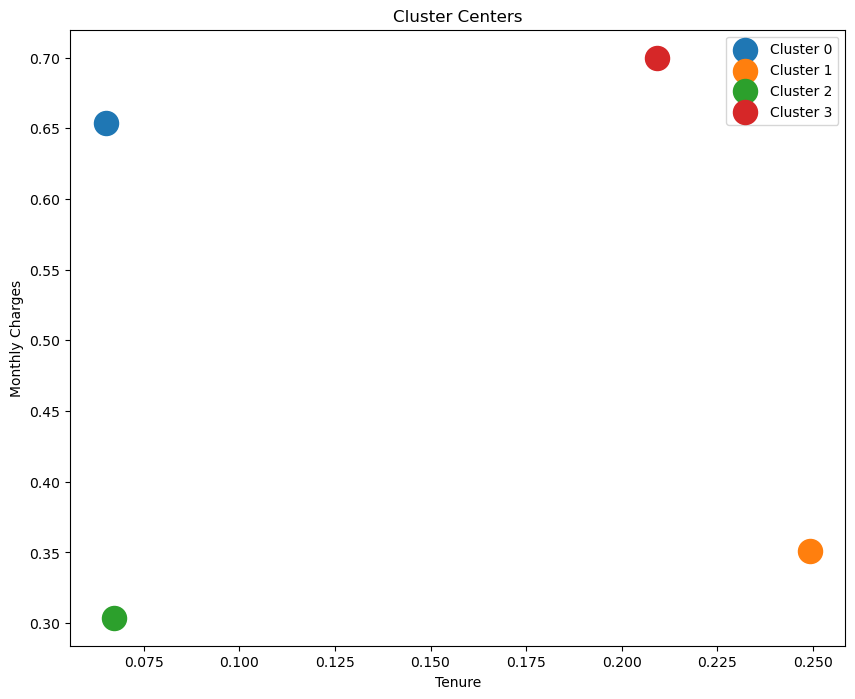

In [51]:

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


# Selected features for clustering
selected_features = selected_features = [
    'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
    'InternetService_Fiber optic', 'InternetService_No',
    'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'
]
X = data[selected_features]

# Choose the number of clusters (replace 'n_clusters' with your desired number)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Evaluation
# Silhouette score
silhouette_avg = silhouette_score(X, data['cluster'])
print("Silhouette Score:", silhouette_avg)

# Calinski-Harabasz score
calinski_harabasz = calinski_harabasz_score(X, data['cluster'])
print("Calinski-Harabasz Score:", calinski_harabasz)

# Davies-Bouldin score
davies_bouldin = davies_bouldin_score(X, data['cluster'])
print("Davies-Bouldin Score:", davies_bouldin)

# Visualization
# Pairplot of selected features colored by cluster
sns.pairplot(data, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='cluster', palette='viridis')
plt.show()

# Visualize cluster centers
cluster_centers = kmeans.cluster_centers_
plt.figure(figsize=(10, 8))
for i in range(n_clusters):
    plt.scatter(cluster_centers[i, 0], cluster_centers[i, 1], s=300, label=f'Cluster {i}')
plt.legend()
plt.title('Cluster Centers')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()
